## Mapping Heat Risk and Vulnerable Populations in African Cities: A Case Study of Lagos, Nigeria

### AI Gendering Conference

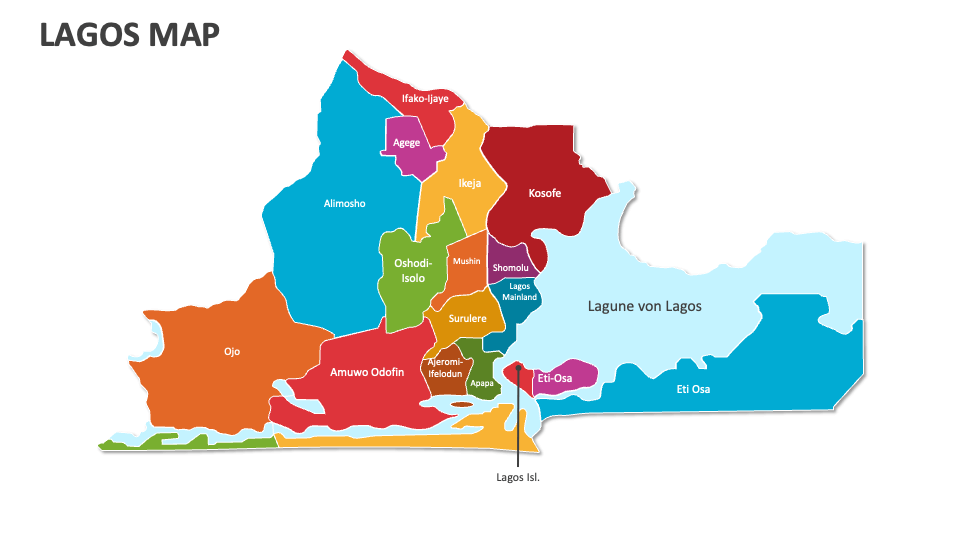

#### TABLE OF CONTENT

#### 1. INTRODUCTION
    1.0 OVERVIEW
    1.1 AIM

#### 2. REPOSITORY
    2.0 IMPORT LIBRARIES
    2.1 LOAD DATASETS

#### 3. UNDERSTAND DATA
     3.0 UNDERSTAND THE DATA
     3.1 DEFINE BOUNDARY

#### 4. COMPREHENSIVE ANALYSIS
     4.0 TOTAL AREA FOR LAGOS
     4.1 LOAD LAND SURFACE TEMPERATURE RASTER FILES FOR LAGOS
     4.2 CALCULATE MEAN LAND SURFACE TEMPERATURE
     4.3 LOAD LAGOS POPULATION RASTER FILE
     4.4 GET AVERAGE TEMPERATURE FOR EACH LGA
     4.5 GET POPULATION DATA FOR EACH LGA
     4.6 MERGE POPULATION DATA WITH LST DATA
     4.7 MAP HEAT RISK EXPOSURE BY GENDER

#### 5. SUMMARY
    

#### 6. DATA SOURCES/REFERENCES

#### 1. INTRODUCTION
    1.0 OVERVIEW

Urban areas across Africa are increasingly facing extreme heat events due to the combined effects of climate change, rapid urbanization, and limited infrastructure resilience. Lagos, Nigeria; Africa’s most populous city, is particularly vulnerable, with dense informal settlements, limited green cover, and socioeconomic inequalities that heighten the impact of heat risk.

This study uses geospatial analysis to map heat risk across Lagos, integrating remote sensing data (e.g., land surface temperature, vegetation indices) with demographic and socioeconomic datasets. By overlaying heat exposure patterns with population density, age distribution, income levels, and housing conditions, the research identifies hotspots where vulnerable populations, such as children, the elderly, and low-income residents, face the highest climate-related health risks.

The project not only visualizes spatial disparities but also highlights intersections between environmental hazards and social inequality. These insights can inform targeted climate adaptation policies, urban greening initiatives, and public health interventions aimed at protecting at-risk communities. The case study contributes to broader discussions on climate justice in African cities and offers a replicable framework for integrating environmental and social data to address urban heat challenges across the continent.

    1.1 AIM

To visualize urban heat risk in Lagos and identify areas where vulnerable populations may be most at risk, using publicly available geospatial and demographic data.

#### 2. REPOSITORY
    2.0 IMPORT LIBRARIES

Importing libraries is a critical step before loading the dataset. It is critical to import only the libraries that you are certain you will need to work with your dataset. To import to libraries, use the keyword import.

In [1]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
import geoplot as gplt 
import geoplot.crs as gcrs 
import folium
import os
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


    2.1 LOAD DATASET

In [2]:
# Load dataset to define Lagos's admin boundaries
lag_admin = (r"C:\Users\User\Documents\Tech\asai\Mapping project\For Lagos shape file\NGA_AL4_Lagos.json")
# Read geojson file into a geodataframe
lag_admin_gdf = gpd.read_file(lag_admin) 
lag_admin_gdf

,country,ISO3166_2,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,geometry
0,NGA,NG-LA,Lagos,,Lagos,,administrative,4,Q815913,en:Lagos State,2019-08-24 22:02:02,"POLYGON ((2.70629 6.39651, 2.70669 6.39350, 2...."


#### 3. UNDERSTAND DATA

In [3]:
# Check no.of rows and columns for admin boundary dataframme
lag_admin_gdf.shape

(1, 12)

The administrative boundary dataframe has 1 row and 12 columns.

In [4]:
# View all column titles in the dataframe
lag_admin_gdf.columns

Index(['country', 'ISO3166_2', 'name', 'enname', 'locname', 'offname',
       'boundary', 'adminlevel', 'wikidata', 'wikimedia', 'timestamp',
       'geometry'],
      dtype='object')

The above shows the names of the columns.

In [5]:
# Check the data-type of each column
lag_admin_gdf.dtypes

country               object
ISO3166_2             object
name                  object
enname                object
locname               object
offname               object
boundary              object
adminlevel             int64
wikidata              object
wikimedia             object
timestamp     datetime64[ns]
geometry            geometry
dtype: object

The above shows the data types for each column.

In [6]:
# Check information about the dataframe
lag_admin_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   country     1 non-null      object        
 1   ISO3166_2   1 non-null      object        
 2   name        1 non-null      object        
 3   enname      1 non-null      object        
 4   locname     1 non-null      object        
 5   offname     1 non-null      object        
 6   boundary    1 non-null      object        
 7   adminlevel  1 non-null      int64         
 8   wikidata    1 non-null      object        
 9   wikimedia   1 non-null      object        
 10  timestamp   1 non-null      datetime64[ns]
 11  geometry    1 non-null      geometry      
dtypes: datetime64[ns](1), geometry(1), int64(1), object(9)
memory usage: 228.0+ bytes


This provides basic information about the dataframe. It contains categorical values, which are represented by columns with 'object' data types, numerical values, which are represented with 'int64' data types, and geometric data, which is stored in columns with 'geometry' data types. Geometric data represents spatial or geographic information.

In [7]:
# Check the coordinate system of the dataframe
lag_admin_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The Coordinate system of the dataframe is 4326, which is the WGS 84 coordinate system.

In [8]:
# Check the geometric type of the dataframe
lag_admin_gdf.geom_type

0    Polygon
dtype: object

       3.1 DEFINE THE BOUNDARY

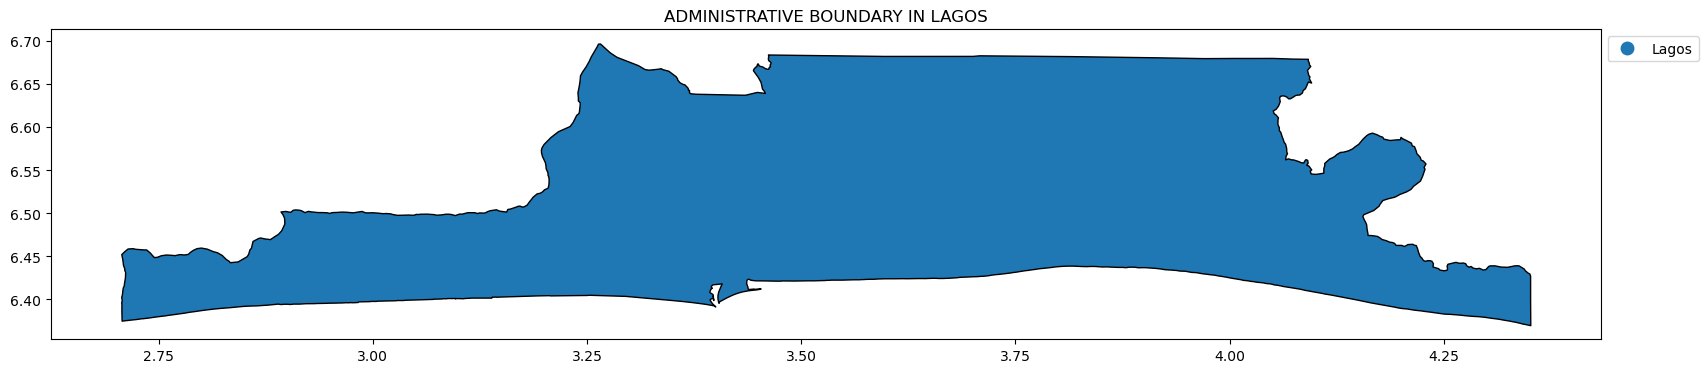

In [9]:
# Create plot
fig, ax = plt.subplots(figsize=(20, 15))

# Plot the administrative boundary of Lagos
lag_admin_gdf.plot(ax=ax, cmap="tab20", column="locname", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, edgecolor="black")
ax.set_title("ADMINISTRATIVE BOUNDARY IN LAGOS")

# Display plot
plt.show()


**Observation**

The plot above illustrates the administrative boundary of Lagos, Nigeria.

#### 4. COMPREHENSIVE ANALYSIS

    4.0 TOTAL AREA FOR LAGOS

In [10]:
# Get the total area for Lagos

# Replace EPSG:4326 with a projects CRS of 32735
projected_crs = "EPSG:32631"

# Re-project geometries to a projected CRS
lag_admin_gdf = lag_admin_gdf.to_crs(projected_crs)

# Get the total area of Lagos in sqm of the new CRS
total_area = lag_admin_gdf["geometry"].area.sum()

print(f"Total Area: {total_area} sqm")

Total Area: 3587380081.8601155 sqm


The size of Lagos is approximately 3,587.38 km²  

In [11]:
# Convert 'timestamp_column' to strings before passing them to Folium.
lag_admin_gdf["timestamp"] = lag_admin_gdf["timestamp"].dt.strftime("%Y-%m-%d %H:%M:%S")
# Create an interactive map of lagos showing different areas
lag_admin_gdf.explore()

In [12]:
# Reproject geometries to original CRS for Lagos
original_crs = "EPSG:4326"
lag_admin_gdf = lag_admin_gdf.to_crs(original_crs)

    4.1 LOAD LAND SURFACE TEMPERATURE RASTER FILES FOR LAGOS

In [13]:
import rasterio
import glob

# Folder containing Lagos-clipped LST TIFFs
tif_folder = r"C:\Users\User\Documents\Tech\asai\Mapping project\Satellite Heat Data\Lagos LST files"

# Get all .tif files in the folder
tif_files = sorted(glob.glob(os.path.join(tif_folder, "*.tif")))



In [14]:
# Read them into a numpy stack
stack_list = []
for tif in tif_files:
    with rasterio.open(tif) as src:
        # Read first band
        data = src.read(1) 
        stack_list.append(data)

# Convert list to 3D numpy array (time, height, width)
stack_array = np.stack(stack_list, axis=0)

print("Stack shape:", stack_array.shape)



Stack shape: (16, 39, 195)


    4.2 CALCULATE MEAN LAND SURFACE TEMPERATURE

In [15]:
# Load LST folder path
tif_folder = r"C:\Users\User\Documents\Tech\asai\Mapping project\Satellite Heat Data\Lagos LST files"
output_folder = os.path.join(tif_folder, "processed")

# Create folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Calculate mean LST
mean_lst = np.mean(stack_array, axis=0)

# Use metadata from first file
with rasterio.open(tif_files[0]) as src:
    meta = src.meta

meta.update(dtype=rasterio.float32, count=1)

# Save to processed folder
out_file = os.path.join(output_folder, "mean_LST_lagos.tif")
with rasterio.open(out_file, "w", **meta) as dest:
    dest.write(mean_lst.astype(rasterio.float32), 1)

print("Mean LST saved to:", out_file)


Mean LST saved to: C:\Users\User\Documents\Tech\asai\Mapping project\Satellite Heat Data\Lagos LST files\processed\mean_LST_lagos.tif


In [16]:
# check the raster values

print("Min:", np.nanmin(stack_array))
print("Max:", np.nanmax(stack_array))
print("Mean:", np.nanmean(stack_array))


Min: 0
Max: 15483
Mean: 2603.3302268244574


In [17]:
# Apply Scale Factor and Transform stack to degree celcius

# Replace fill values (0) with NaN
stack_array = np.where(stack_array == 0, np.nan, stack_array)

# Convert to Celsius
stack_array_celsius = (stack_array * 0.02) - 273.15

print("Min (°C):", np.nanmin(stack_array_celsius))
print("Max (°C):", np.nanmax(stack_array_celsius))
print("Mean (°C):", np.nanmean(stack_array_celsius))


Min (°C): 11.870000000000005
Max (°C): 36.51000000000005
Mean (°C): 23.14896361425501


In [18]:
mean_map = np.nanmean(stack_array_celsius, axis=0)
max_map = np.nanmax(stack_array_celsius, axis=0)


C:\Users\User\AppData\Local\Temp\ipykernel_44248\1175927795.py:1: RuntimeWarning: Mean of empty slice
  mean_map = np.nanmean(stack_array_celsius, axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_44248\1175927795.py:2: RuntimeWarning: All-NaN slice encountered
  max_map = np.nanmax(stack_array_celsius, axis=0)


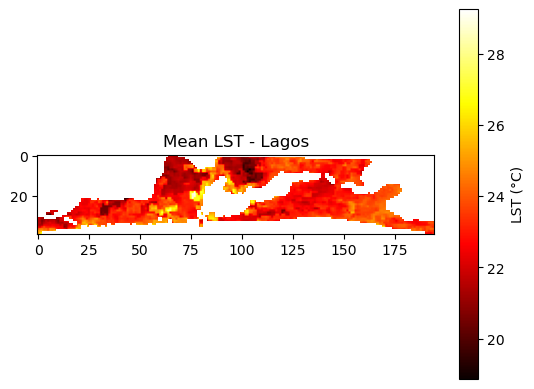

In [19]:
# Make a Mean LST map
plt.imshow(mean_map, cmap="hot")
plt.colorbar(label="LST (°C)")
plt.title("Mean LST - Lagos")
plt.show()


**Observation**

The mean LST map of Lagos shows higher surface temperatures concentrated in central and inland urban areas, likely corresponding to built-up zones and industrial regions. Cooler areas appear along the coast and vegetated zones, reflecting the cooling influence of water bodies and green cover.

C:\Users\User\AppData\Local\Temp\ipykernel_44248\2064055413.py:2: RuntimeWarning: All-NaN slice encountered
  max_map = np.nanmax(stack_array_celsius, axis=0)


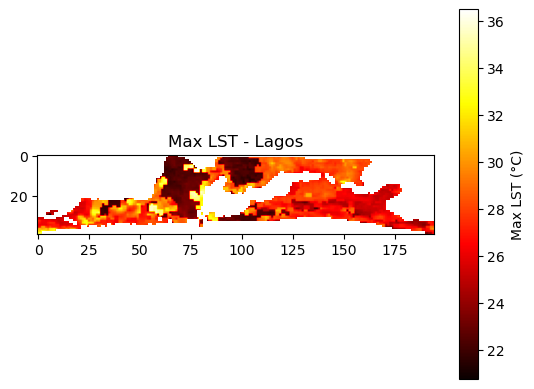

In [20]:
# Make a Max LST map
max_map = np.nanmax(stack_array_celsius, axis=0)

plt.imshow(max_map, cmap="hot")
plt.colorbar(label="Max LST (°C)")
plt.title("Max LST - Lagos")
plt.show()


**Observation**

The maximum LST map shows that the hottest areas in Lagos reach over 36 °C, with heat concentrated in specific central and southern zones. Cooler zones, mostly below 24 °C, are located along the outskirts, indicating spatial temperature variation

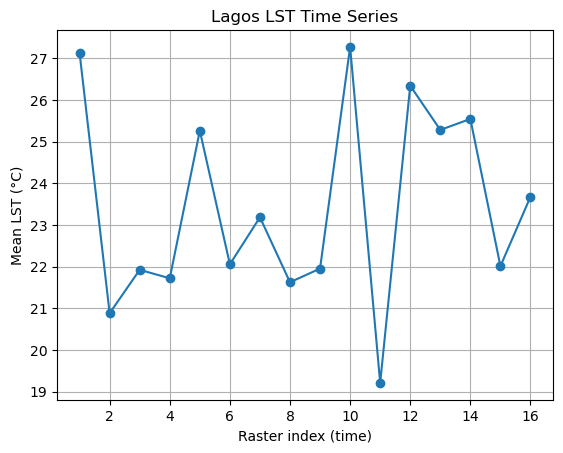

In [21]:
# Create a Lagos Time Series Plot

mean_values_per_raster = np.nanmean(stack_array_celsius, axis=(1, 2))

plt.plot(range(1, len(mean_values_per_raster)+1), mean_values_per_raster, marker='o')
plt.xlabel("Raster index (time)")
plt.ylabel("Mean LST (°C)")
plt.title("Lagos LST Time Series")
plt.grid(True)
plt.show()


**Observation**

The mean LST shows notable fluctuations over time, peaking above 27 °C around raster indices 1, 10, and 12.
Some periods drop below 21 °C, suggesting intermittent cooler conditions possibly linked to seasonal or weather changes.

    4.3 LOAD LAGOS POPULATION RASTER FILE

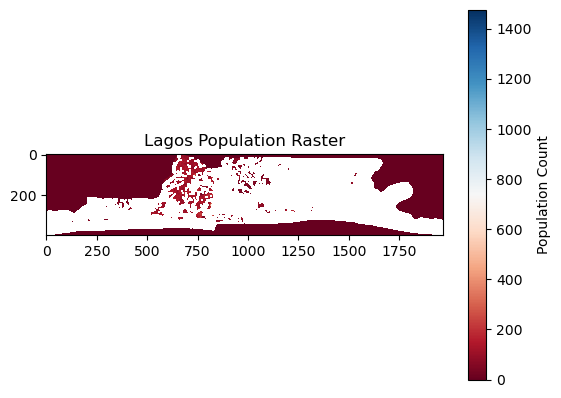

In [22]:
# Open the raster
raster_path = r"C:\Users\User\Documents\Tech\asai\Mapping project\Pop. & Vulnerability data\NGA_population_v2_1_gridded\lagos_population.tif"
with rasterio.open(raster_path) as src:
    data = src.read(1)
    plt.imshow(data, cmap='RdBu')
    plt.colorbar(label='Population Count')
    plt.title('Lagos Population Raster')
    
    # Display plot
    plt.show()


**Observation**

The raster map shows varying population densities across Lagos, with the highest concentrations indicated in dark blue and the lowest in dark red. Large portions in red represent regions with very low or no population.

    4.3 LOAD LAGOS LGAs ADMIN DATA

In [23]:
# Load dataset to define Nig lga's admin boundaries
niglga_admin = (r"C:\Users\User\Documents\Tech\asai\Mapping project\nigeria_polbnda_admin_2_unsalb\Admin_2\NGA_cnty_admin2\nga_polnda_adm2_1m_salb.shp")
# Read geojson file into a geodataframe
niglga_admin_gdf = gpd.read_file(niglga_admin) 
niglga_admin_gdf.head(2)

,CNTRY_NAME,CNTRY_CODE,ADM1_NAME,ADM1_CODE,ADM2_NAME,ADM2_CODE,HRname,HRpcode,HRparent,Shape_Leng,Shape_Area,ADM2_New,geometry
0,Nigeria,NGA,Abia,NGA001,Aba North,NGA001001,Aba North,NG001001,NG001,0.286932,0.001857,Aba North,"POLYGON ((7.32020 5.10293, 7.33247 5.11470, 7...."
1,Nigeria,NGA,Abia,NGA001,Aba South,NGA001002,Aba South,NG001002,NG001,0.253419,0.004010,Aba South,"POLYGON ((7.30668 5.07748, 7.30892 5.08036, 7...."


In [24]:
# Filter for Lagos State
laglga_gdf = niglga_admin_gdf[niglga_admin_gdf['ADM1_NAME'] == 'Lagos']

# Save to file if needed
laglga_gdf.to_file("lagos_lgas.shp")

print(f"Filtered {len(laglga_gdf)} LGAs in Lagos State")

Filtered 20 LGAs in Lagos State


In [25]:
# Check the Lagos lgas dataframe
laglga_gdf.head(5)

,CNTRY_NAME,CNTRY_CODE,ADM1_NAME,ADM1_CODE,ADM2_NAME,ADM2_CODE,HRname,HRpcode,HRparent,Shape_Leng,Shape_Area,ADM2_New,geometry
478,Nigeria,NGA,Lagos,NGA025,Agege,NGA025001,Agege,NG025001,NG025,0.140389,0.000909,Agege,"POLYGON ((3.30719 6.64738, 3.31476 6.64746, 3...."
479,Nigeria,NGA,Lagos,NGA025,Ajeromi-Ifelodun,NGA025002,Ajeromi-Ifelodun,NG025002,NG025,0.132358,0.001001,Ajeromi-Ifelodun,"POLYGON ((3.31646 6.45904, 3.32106 6.46039, 3...."
480,Nigeria,NGA,Lagos,NGA025,Alimosho,NGA025003,Alimosho,NG025003,NG025,0.590789,0.015026,Alimosho,"POLYGON ((3.25986 6.69093, 3.26432 6.68634, 3...."
481,Nigeria,NGA,Lagos,NGA025,Apapa,NGA025005,Apapa,NG025005,NG025,0.307966,0.002163,Apapa,"POLYGON ((3.34169 6.47491, 3.34725 6.47776, 3...."
482,Nigeria,NGA,Lagos,NGA025,Ifako-Ijaye,NGA025010,Ifako-Ijaye,NG025010,NG025,0.263509,0.002160,Ifako-Ijaye,"POLYGON ((3.25986 6.69093, 3.26113 6.69312, 3...."


In [26]:
# Check no.of rows and columns for lga admin boundary dataframme
laglga_gdf.shape

(20, 13)

The administrative boundary for Lagos LGAs dataframe has 20 row and 13 columns.

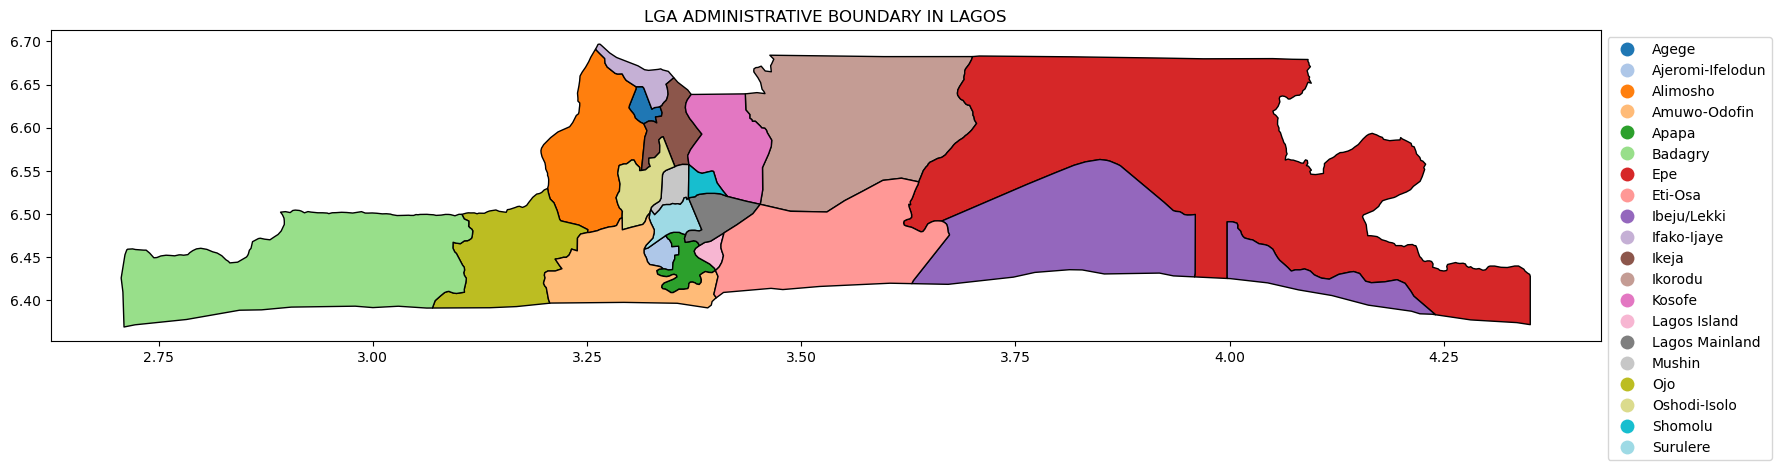

In [27]:
# Create plot
fig, ax = plt.subplots(figsize=(20, 15))

# Plot the administrative boundary of Lagos
laglga_gdf.plot(ax=ax, cmap="tab20", column="ADM2_NAME", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, edgecolor="black")
ax.set_title("LGA ADMINISTRATIVE BOUNDARY IN LAGOS")

# Display plot
plt.show()


**Observation**

The plot above illustrates the lga administrative boundary in Lagos, Nigeria

    4.4 GET AVERAGE TEMPERATURE FOR EACH LGA

In [28]:
import glob
import rasterio
from rasterstats import zonal_stats

# Paths
folder_path = r"C:\Users\User\Documents\Tech\asai\Mapping project\Satellite Heat Data\Lagos LST files"

# Load shapefile
zones = gpd.read_file("lagos_lgas.shp")

# Get sorted raster files (LST_lagos_1.tif ... LST_lagos_16.tif)
files = sorted(
    glob.glob(os.path.join(folder_path, "LST_lagos_*.tif")),
    key=lambda x: int(os.path.basename(x).split('_')[-1].split('.')[0])
)

In [29]:
# Dates from Jul 1, 2025 to Aug 1, 2025
dates = pd.date_range(start="2025-07-01", end="2025-08-01", periods=len(files))

# Storage for results
all_results = []

# Landsat LST scale factor
scale_factor = 0.02

In [30]:
for file, date in zip(files, dates):
    with rasterio.open(file) as src:
        raster_crs = src.crs
    
    # Reproject LGAs to raster CRS
    zones_proj = zones.to_crs(raster_crs)
    
    # Run zonal stats (ignore raster's nodata value)
    stats = zonal_stats(
        zones_proj,
        file,
        stats=["mean"],
        nodata=None
    )
    
    # Append results for each LGA
    for lga_name, s in zip(zones["ADM2_NAME"], stats):
        if s["mean"] is not None:
            # Apply scale factor and convert from Kelvin to Celsius
            mean_celsius = s["mean"] * scale_factor - 273.15
            all_results.append({
                "date": date,
                "LGA": lga_name,
                "mean_LST_C": mean_celsius
            })

In [31]:
# Create DataFrame
lgalst = pd.DataFrame(all_results)

# Save results
lgalst.to_csv("lagos_LGA_avg_LST_Jul_Aug2025_Celsius.csv", index=False)

print(lgalst.head())

        date             LGA  mean_LST_C
0 2025-07-01          Mushin   34.906250
1 2025-07-01        Surulere   33.270000
2 2025-07-01         Ikorodu   28.180526
3 2025-07-01          Kosofe   29.901282
4 2025-07-01  Lagos Mainland   32.627143


In [32]:
lgalst

,date,LGA,mean_LST_C
0,2025-07-01,Mushin,34.906250
1,2025-07-01,Surulere,33.270000
2,2025-07-01,Ikorodu,28.180526
3,2025-07-01,Kosofe,29.901282
4,2025-07-01,Lagos Mainland,32.627143
...,...,...,...
146,2025-08-01,Ojo,22.139615
147,2025-08-01,Ibeju/Lekki,22.143119
148,2025-08-01,Amuwo-Odofin,23.167500
149,2025-08-01,Eti-Osa,22.195139


In [33]:
# Plot mean Land Surface Temperature for each LGA over a priod of time

# Group by LGA and compute mean over all dates
mean_over_time = lgalst.groupby("LGA", as_index=False)["mean_LST_C"].mean()


In [34]:
# Merge the mean LST data back with the original shapefile
zones_mean = zones.merge(mean_over_time, left_on="ADM2_NAME", right_on="LGA")


In [35]:
from adjustText import adjust_text

# Reproject to projected CRS (UTM Zone 31N for Lagos)
zones_proj = zones_mean.to_crs(epsg=32631)

# Compute centroids
zones_proj["coords"] = zones_proj.geometry.centroid



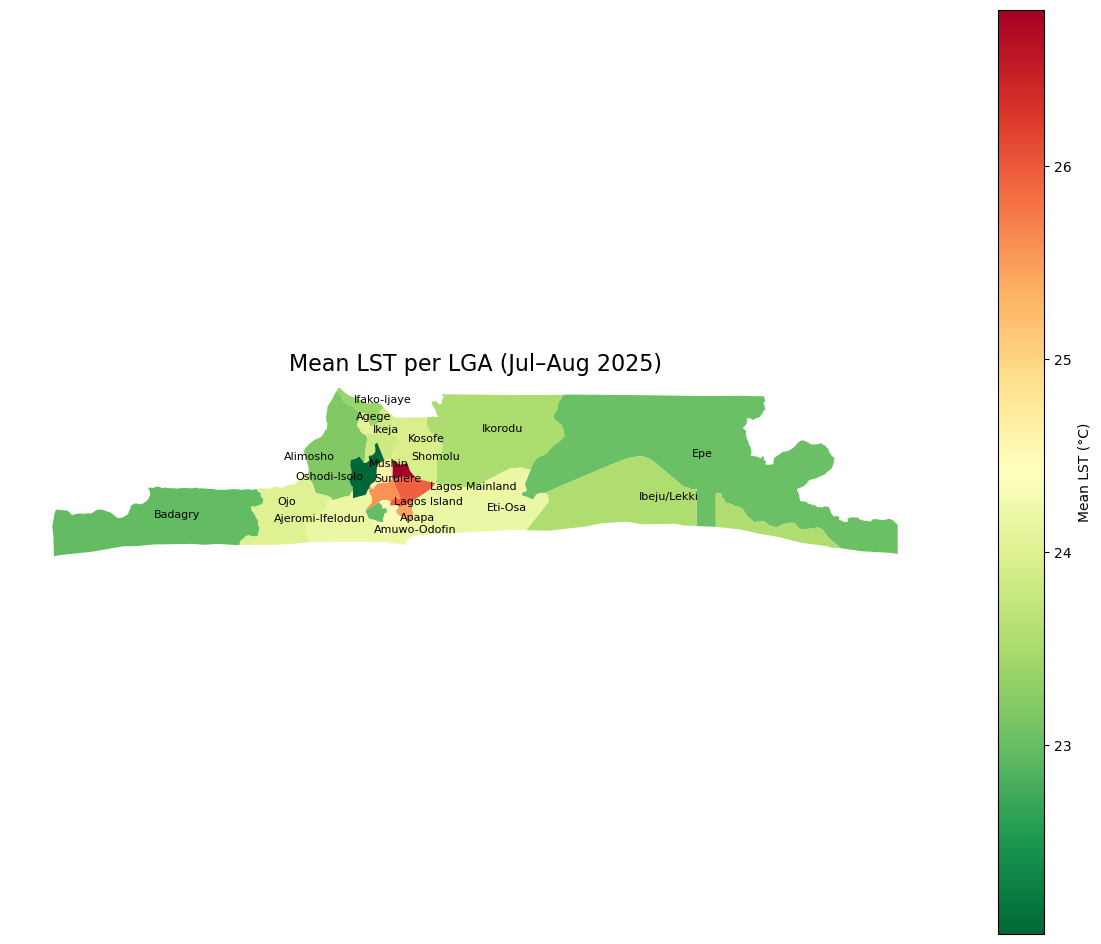

In [36]:
# Plot base map
fig, ax = plt.subplots(1, 1, figsize=(15, 12))
zones_proj.plot(
    column="mean_LST_C",
    cmap="RdYlGn_r",
    legend=True,
    legend_kwds={"label": "Mean LST (°C)"},
    ax=ax
)

# Collect label positions
texts = []
for idx, row in zones_proj.iterrows():
    texts.append(
        ax.text(
            row["coords"].x,
            row["coords"].y,
            row["ADM2_NAME"],
            ha="center",
            fontsize=8
        )
    )

# Adjust to prevent overlaps
adjust_text(
    texts,
    ax=ax,
    expand_points=(1.2, 1.4),
    expand_text=(1.2, 1.4),
    arrowprops=None
)

ax.set_title("Mean LST per LGA (Jul–Aug 2025)", fontsize=16)
ax.axis("off")

# Display plot
plt.show()


**Observation**

The map shows that the hottest areas (mean LST above 25 °C) are concentrated in central LGAs like Surulere, Mushin, and Lagos Island. In contrast, peripheral LGAs such as Epe, Badagry, and Ibeju-Lekki record cooler mean LST values, likely due to lower urbanization and higher vegetation cover.

In [48]:
# Save plot as high-resolution PNG
plt.savefig("mean_LST_per_LGA_Jul_Aug2025.png", dpi=300, bbox_inches="tight")

<Figure size 640x480 with 0 Axes>

    4.5 GET POPULATION DATA FOR EACH LGA

In [38]:
# Load shapefile
zones = gpd.read_file("lagos_lgas.shp")

# Path to population raster
pop_raster = r"C:\Users\User\Documents\Tech\asai\Mapping project\Pop. & Vulnerability data\NGA_population_v2_1_gridded\lagos_population.tif"

# Reproject LGAs to raster CRS
with rasterio.open(pop_raster) as src:
    raster_crs = src.crs

zones_proj1 = zones.to_crs(raster_crs)

In [39]:
# Run zonal stats for population
pop_stats = zonal_stats(zones_proj1, pop_raster, stats=["sum"], nodata=-9999)

# Create DataFrame for population
pop_lga = pd.DataFrame({
    "LGA": zones["ADM2_NAME"],
    "population": [p["sum"] for p in pop_stats]
})

print(pop_lga.head())

                LGA    population
0             Agege  1.739358e+05
1  Ajeromi-Ifelodun  2.063262e+05
2          Alimosho  2.042902e+06
3             Apapa  1.318809e+05
4       Ifako-Ijaye  3.437464e+05


In [40]:
pop_lga

,LGA,population
0,Agege,1.739358e+05
1,Ajeromi-Ifelodun,2.063262e+05
2,Alimosho,2.042902e+06
3,Apapa,1.318809e+05
4,Ifako-Ijaye,3.437464e+05
5,Ikeja,2.785447e+05
6,Mushin,1.987411e+05
7,Oshodi-Isolo,5.354899e+05
8,Surulere,2.523307e+05
9,Ikorodu,1.227183e+06


The above shows the populatin for each LGA in Lagos.

    4.6 MERGE POPULATION DATA WITH LST DATA

In [41]:
# Merge on LGA name
lgalst_merged = lgalst.merge(pop_lga, on="LGA", how="left")

print(lgalst_merged.head())

        date             LGA  mean_LST_C    population
0 2025-07-01          Mushin   34.906250  1.987411e+05
1 2025-07-01        Surulere   33.270000  2.523307e+05
2 2025-07-01         Ikorodu   28.180526  1.227183e+06
3 2025-07-01          Kosofe   29.901282  5.024922e+05
4 2025-07-01  Lagos Mainland   32.627143  2.004213e+05


    4.7 MAP HEAT RISK EXPOSURE BY GENDER

Datasets of female between ages 15-49 is considered for analysis because that is the age group that is biologically vulnerable.

In [42]:
from rasterstats import zonal_stats

# Load LGA boundaries
lgas = gpd.read_file("lagos_lgas.shp")

# Compute per-LGA female 15–19 population totals
stats = zonal_stats(lgas, r"C:\Users\User\Documents\Tech\asai\Mapping project\NGA_population_v2_1_agesex\NGA_population_v2_1_agesex\NGA_population_v2_1_agesex_f15_49.tif", stats=["sum"])
stats_df = pd.DataFrame(stats)
lgas = lgas.join(stats_df)

lgas.head(5)


,CNTRY_NAME,CNTRY_CODE,ADM1_NAME,ADM1_CODE,ADM2_NAME,ADM2_CODE,HRname,HRpcode,HRparent,Shape_Leng,Shape_Area,ADM2_New,geometry,sum
0,Nigeria,NGA,Lagos,NGA025,Agege,NGA025001,Agege,NG025001,NG025,0.140389,0.000909,Agege,"POLYGON ((3.30719 6.64738, 3.31476 6.64746, 3....",45501.804688
1,Nigeria,NGA,Lagos,NGA025,Ajeromi-Ifelodun,NGA025002,Ajeromi-Ifelodun,NG025002,NG025,0.132358,0.001001,Ajeromi-Ifelodun,"POLYGON ((3.31646 6.45904, 3.32106 6.46039, 3....",51662.773438
2,Nigeria,NGA,Lagos,NGA025,Alimosho,NGA025003,Alimosho,NG025003,NG025,0.590789,0.015026,Alimosho,"POLYGON ((3.25986 6.69093, 3.26432 6.68634, 3....",533915.000000
3,Nigeria,NGA,Lagos,NGA025,Apapa,NGA025005,Apapa,NG025005,NG025,0.307966,0.002163,Apapa,"POLYGON ((3.34169 6.47491, 3.34725 6.47776, 3....",32238.019531
4,Nigeria,NGA,Lagos,NGA025,Ifako-Ijaye,NGA025010,Ifako-Ijaye,NG025010,NG025,0.263509,0.002160,Ifako-Ijaye,"POLYGON ((3.25986 6.69093, 3.26113 6.69312, 3....",90339.000000


In [43]:
# Compute per-LGA female 15–49 population
pop_raster = r"C:\Users\User\Documents\Tech\asai\Mapping project\NGA_population_v2_1_agesex\NGA_population_v2_1_agesex\NGA_population_v2_1_agesex_f15_49.tif"
stats = zonal_stats(lgas, pop_raster, stats=["sum"])
lgas['female_15_49'] = pd.DataFrame(stats)['sum']

In [44]:
# Merge mean LST from precomputed table (lgalst_merged)
# lgalst_merged has columns: ['LGA', 'mean_LST_C', 'population']
# Rename mean_LST_C for consistency
lgalst_merged = lgalst_merged.rename(columns={'mean_LST_C': 'mean_LST'})
lgas = lgas.merge(lgalst_merged[['LGA', 'mean_LST']], left_on='ADM2_NAME', right_on='LGA', how='left')

In [45]:
# Ensure numeric columns
lgas['female_15_49'] = pd.to_numeric(lgas['female_15_49'], errors='coerce')
lgas['mean_LST'] = pd.to_numeric(lgas['mean_LST'], errors='coerce')

# Compute heat exposure
lgas['heat_exposure'] = lgas['female_15_49'] * lgas['mean_LST']

# categorize exposure
lgas['exposure_level'] = pd.qcut(lgas['heat_exposure'], 3, labels=['Low', 'Medium', 'High'])

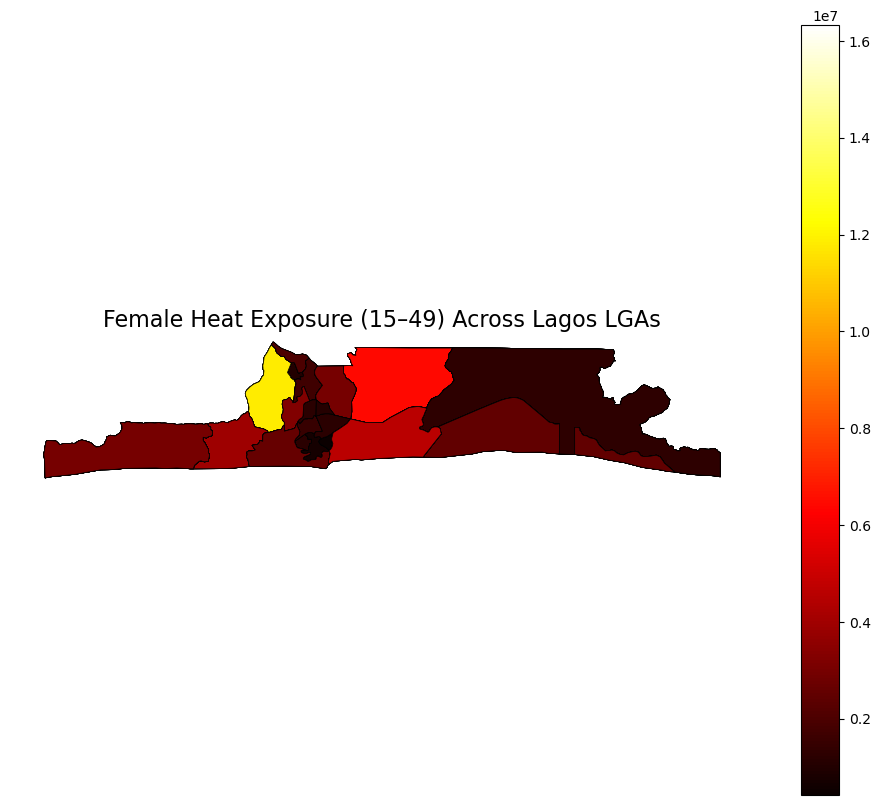

In [46]:
# Plot continuous heat exposure

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
lgas.plot(column='heat_exposure',
          cmap='hot',
          legend=True,
          edgecolor='black',
          linewidth=0.5,
          ax=ax)
ax.set_title("Female Heat Exposure (15–49) Across Lagos LGAs", fontsize=16)
ax.axis('off')
plt.show()


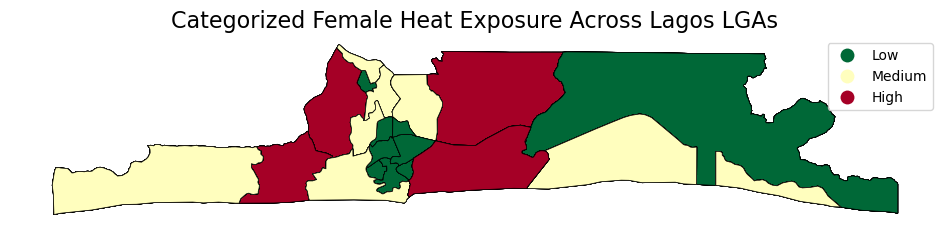

In [47]:
# Plot categorized exposure
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
lgas.plot(column='exposure_level',
          # Red = high exposure
          cmap='RdYlGn_r',  
          legend=True,
          edgecolor='black',
          linewidth=0.5,
          ax=ax)
ax.set_title("Categorized Female Heat Exposure Across Lagos LGAs", fontsize=16)
ax.axis('off')

# Display plot
plt.show()


**Observation**

Based on the map, the LGAs with high female heat exposure are primarily located in the central and western inland areas of Lagos. Interestingly, these high-exposure zones are often directly adjacent to clusters of LGAs with low heat exposure, indicating sharp differences in risk over small geographic distances.

#### 5. SUMMARY

**Summary**

When we step back and look at Lagos through the lens of heat risk, the story is strikingly clear. This analysis showed that land surface temperatures are not evenly distributed across the city. Instead, they cluster-rising sharply in the densely built-up local government areas where concrete and asphalt dominate, and green cover is scarce.

By bringing population data into the picture, we see another layer of this story. The hottest areas are not just anonymous patches on a map. They are home to some of the most vulnerable communities. Children, the elderly, and low-income households are living at the intersection of high exposure and low capacity to adapt. Among them, females aged 15–49, a biologically vulnerable group face particularly heightened risks, underscoring the gendered dimension of climate exposure.

This exercise demonstrates the power of geospatial analysis. It moves us beyond abstract climate statistics and allows us to point, with precision, to where risks are highest and where interventions matter most. 


**Recommendations**

Based on this work, three key directions emerge:

1. Targeted Urban Greening: Expand tree planting, parks, and community gardens in identified heat hotspots. These interventions are not cosmetic—they are cooling infrastructure.

2. Heat-Health Action Plans: Prioritize healthcare and social support in vulnerable LGAs. Simple measures like cooling centers, early warning systems, and awareness campaigns can save lives during heatwaves.

3. Integrating Equity into Climate Planning: Urban adaptation strategies must go hand-in-hand with social policy. The people most at risk are often those with the fewest resources to cope. Any meaningful response must address both environmental and social vulnerabilities.

In short, this analysis reminds us that heat risk is not evenly shared. It is concentrated, it is unequal, and it is deeply human. As African cities continue to grow, our challenge is to ensure that adaptation is not just about cooling the city, but about protecting the people who live in it.

#### 6. DATA SOURCES/REFERENCES

GADM administrative boundaries – https://gadm.org/download_country_v3.html

OpenStreetMap Nigeria extract – https://download.geofabrik.de/africa/nigeria.html

WorldPop population density – https://www.worldpop.org/

NASA Earthdata land surface temperature imagery – https://earthdata.nasa.gov/